In [1]:
import tools
import numpy as np
import healpy as hp

## Carga de mapa

Se carga el mapa de Planck a 30 GHz con healpy

In [2]:
mapa30 = tools.leer_mapa('../datasets/planck/planck30.fits')

/home/jovyan/QUIJOTE_CMB/tools.py:23: HealpyDeprecationWarning: "verbose" was deprecated in version 1.15.0 and will be removed in a future version. 
  mapa_cmb, header = hp.read_map(ruta_archivo_fits, field=campo, h=True, verbose=False)


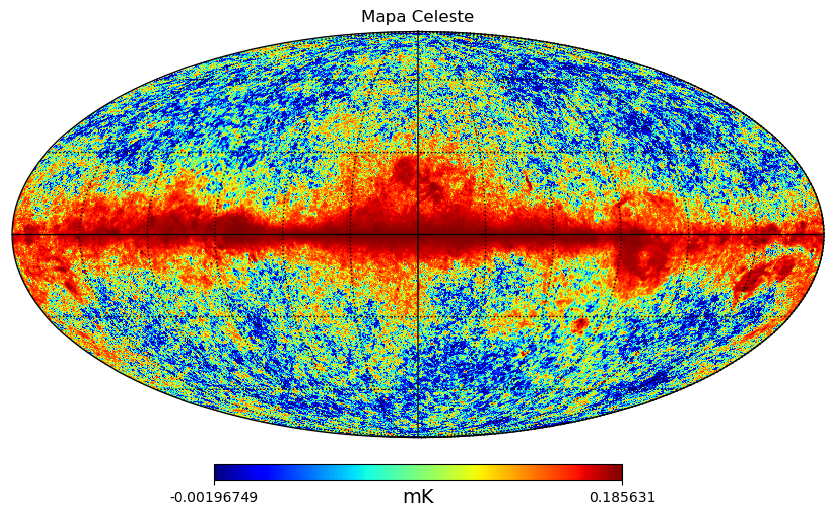

In [3]:
tools.ver_mapa(mapa30,'mollweide')

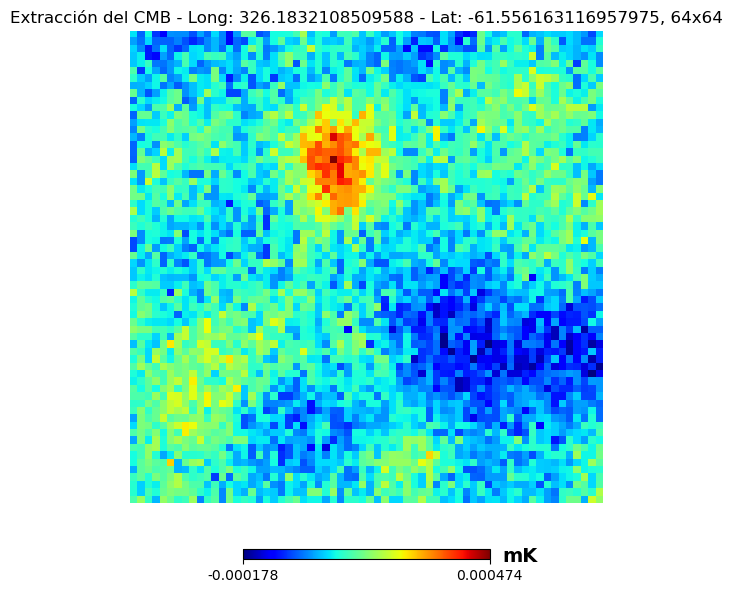

In [4]:
tools.extraer_submapa_cmb(mapa30, 64 ,vmin = None ,nside=1024, res = 3.43, retornar_imagen=False)

## Carga de dataset

Se carga el catálogo de fuentes compactas de Planck a 30 GHz y se convierte en csv para su posterior uso

In [5]:
data = tools.obtener_coord('../datasets/planck/objetos30.fits')

In [6]:
data.to_csv('../datasets/planck/objetos30.csv',sep =';',index = False)

## Creación de vectores para máscara

Para poder crear la máscara con query_disc se deben pasar las coordenadas a vectores

In [7]:
vectores = tools.catalogo_a_vectores_galacticos('../datasets/planck/objetos30.fits')

In [8]:
mapa30_mask = np.copy(mapa30)

## Generación de máscaras

Con los vectores generados anteriormente se crea la máscara para anular los píxeles del mapa que contienen contaminación

In [9]:
mapa30_mask = tools.query_disc_gen(mapa30_mask,vectores)

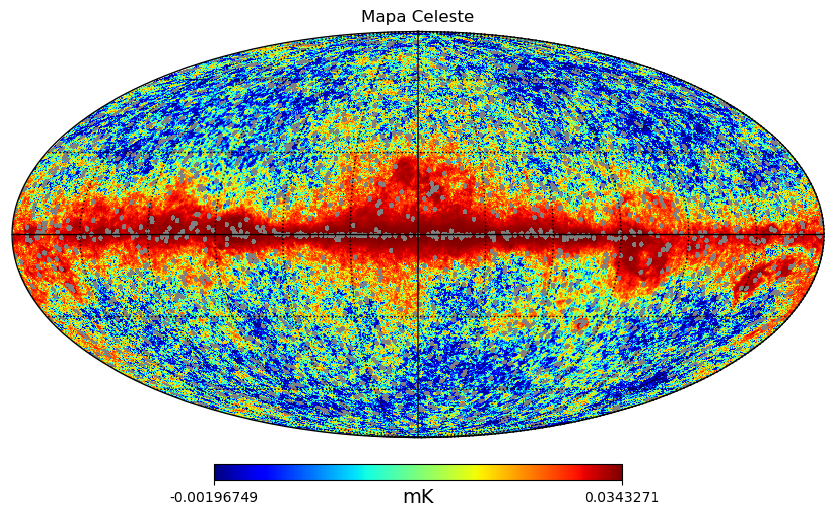

In [10]:
tools.ver_mapa(mapa30_mask,'mollweide')

# Generación de dataset

### División en conjunto de entrenamiento y de evaluación

In [11]:
data = data.sample(frac=1)

test_size = data.shape[0] * 0.2

train_size = data.shape[0]*0.8

cord30_train = data.iloc[:int(train_size),:]

cord30_test = data.iloc[int(train_size):,:]

## Generación de imágenes con fuente de contaminación

Se utiliza la fuinción generadora de imágenes para crear las imágenes con una funete de contaminación, para ello se utilizan los conjuntos de train y test y se genera una imagen con la fuente desplazada de forma aleatoria

In [14]:
import random
for i in range(1,6):
    print(f'iteracion: {i}')
    for name,glon,glat in zip(cord30_test.name,cord30_test.glon,cord30_test.glat):
        extra_lat = round(random.uniform(-0.3, 0.3), 1)
        extra_lon = round(random.uniform(-0.3, 0.3), 1)
        img = tools.extraer_submapa_cmb(mapa30,lat = glat+extra_lat,lon = glon+extra_lon,N = 64,res = 3.43,vmin = None, retornar_imagen=True)
        tools.guardar_imagen_jpg(img,f'../images/planck/images/train/1/fuente_{name}_30_{i}.jpg')

iteracion: 1


KeyboardInterrupt: 

In [15]:
for i in range(1,6):
    print(f'iteracion: {i}')
    for name,glon,glat in zip(cord30_train.name,cord30_train.glon,cord30_train.glat):
        extra_lat = round(random.uniform(-0.3, 0.3), 1)
        extra_lon = round(random.uniform(-0.3, 0.3), 1)
        img = tools.extraer_submapa_cmb(mapa30,lat = glat+extra_lat,lon = glon+extra_lon,N = 64,res = 3.43,vmin = False,retornar_imagen=True)
        tools.guardar_imagen_jpg(img,f'../images/planck/images/test/1/fuente_{name}_30_{i}.jpg')

iteracion: 1


KeyboardInterrupt: 

## Generación de imágenes sin fuente de contaminación

Se utiliza la fuinción generadora de imágenes para crear las imágenes sin funete de contaminación, para ello se utiliza el mapa con los píxeles anulados y se generan imágenes aleatorias con la función generadora de imágenes, después se comprueba si existe algún píxel nulo, en caso de que no lo haya la imagen se guarda

In [16]:
for i in range(1,477):
    object = True
    while object:
        img = tools.extraer_submapa_cmb(mapa30_mask,64,res = 3.43,vmin = None, retornar_imagen=True)
        if not np.any(np.isnan(img)):
            object = False
    tools.guardar_imagen_jpg(img,f'../images/planck/images/train/0/foto_{i}.jpg')
    i +=1


Exception ignored in: <function TransformNode.set_children.<locals>.<lambda> at 0x7fb139a88860>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.11/site-packages/matplotlib/transforms.py", line 198, in <lambda>
    self, lambda _, pop=child._parents.pop, k=id_self: pop(k))

KeyboardInterrupt: 


KeyboardInterrupt: 

In [ ]:
for i in range(1,477):
    object = True
    while object:
        img = tools.extraer_submapa_cmb(mapa30_mask,64,res = 3.43,vmin = False,retornar_imagen=True)
        if not np.any(np.isnan(img)):
            object = False
    tools.guardar_imagen_jpg(img,f'../images/planck/images/test/0/foto_{i}.jpg')
    i +=1